<a href="https://colab.research.google.com/github/braxii24/cv/blob/main/project_work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install required packages
!pip install pandas numpy matplotlib seaborn


In [3]:
# Tokyo 2020 Olympics Twitter Data Analysis
# This notebook analyzes Twitter data related to the Tokyo 2020 Olympics

import os
import gzip
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


In [4]:
# 1. Data Loading
# Function to load JSON.GZ files
def load_json_gz(path, limit=None):
    """
    Load up to `limit` lines from a gzip-compressed JSONL file.
    Returns a flattened pandas DataFrame.
    """
    tweets = []
    with gzip.open(path, 'rt', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if limit is not None and i >= limit:
                break
            try:
                tweets.append(json.loads(line))
            except json.JSONDecodeError:
                pass
    return pd.json_normalize(tweets, sep='_')

# Load and clean the datasets
print("Loading datasets...")

# Load pickle files (prioritized for efficiency)
# Note: We're using the available datasets and cleaning them during the merging process
df_general_pkl = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/tokyo2020-general-20210808.pkl.gz", compression="gzip")
print(f"General pickle dataset loaded: {df_general_pkl.shape}")

df_terms = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/tokyo2020-terms-20210808.pkl.gz", compression="gzip")
print(f"Terms dataset loaded: {df_terms.shape}")

# Load JSON files
# Increased limit to include more data for better analysis
#LIMIT = 30000  # Adjust based on your system's memory
try:
    df_general_json = load_json_gz("/content/drive/My Drive/Colab Notebooks/tokyo2020-general-20210808.json.gz")
    print(f"General JSON dataset loaded: {df_general_json.shape}")
except Exception as e:
    print(f"Error loading general JSON dataset: {e}")
    df_general_json = pd.DataFrame()  # Create empty DataFrame if loading fails

try:
    df_sports = load_json_gz("/content/drive/My Drive/Colab Notebooks/tokyo2020-sports-20210808.json.gz")
    print(f"Sports dataset loaded: {df_sports.shape}")
except Exception as e:
    print(f"Error loading sports JSON dataset: {e}")
    df_sports = pd.DataFrame()  # Create empty DataFrame if loading fails


Loading datasets...
General pickle dataset loaded: (2277490, 19)
Terms dataset loaded: (2045369, 19)
General JSON dataset loaded: (2277518, 396)
Sports dataset loaded: (542749, 390)


In [5]:
# 2. Exploratory Data Analysis

# 2.1 Explore General Pickle Dataset
print("\n--- General Pickle Dataset ---")
print("Columns:", df_general_pkl.columns.tolist())
print("\nSample data:")
display(df_general_pkl.sample(3))
print("\nData types:")
display(df_general_pkl.dtypes)

# 2.2 Explore Terms Dataset
print("\n--- Terms Dataset ---")
print("Columns:", df_terms.columns.tolist())
print("\nSample data:")
display(df_terms.sample(3))
print("\nData types:")
display(df_terms.dtypes)

# 2.3 Explore General JSON Dataset
print("\n--- General JSON Dataset ---")
print("Columns:", df_general_json.columns.tolist())
print("\nSample data:")
display(df_general_json.sample(3))
print("\nData types:")
display(df_general_json.dtypes)

# 2.4 Explore Sports Dataset
print("\n--- Sports Dataset ---")
print("Columns:", df_sports.columns.tolist())
print("\nSample data:")
display(df_sports.sample(3))
print("\nData types:")
display(df_sports.dtypes)



--- General Pickle Dataset ---
Columns: ['id_str', 'user.id_str', 'user.screen_name', 'user.followers_count', 'timestamp_ms', 'retweeted_status.id_str', 'retweeted_status.user.id_str', 'hashtags', 'user_mentions_id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status.id_str', 'quoted_status.user.id_str', 'urls', 'place_full_name', 'place_type', 'place_country', 'coordinates', 'botscore']

Sample data:


,id_str,user.id_str,user.screen_name,user.followers_count,timestamp_ms,retweeted_status.id_str,retweeted_status.user.id_str,hashtags,user_mentions_id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,quoted_status.id_str,quoted_status.user.id_str,urls,place_full_name,place_type,place_country,coordinates,botscore
1717965,1424370010147938305,279779712,ro2re3,391.0,1628431248591,1424176325582012417,1694219437,"[strongertogether, juegosolímpicos, tokyo2020]",[1694219437],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10
121524,1424180825440935938,1270039225128251400,lyuvia_,330.0,1628386143442,1424179035484037122,2220078308,"[olympics, volleyball, 도쿄, 올림픽, 대한민국, kor, tok...","[1219333307302924291, 2220078308]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11
1022874,1424301960522616833,1357184528,luis_almassora,1310.0,1628415024296,1424282090720346114,289327014,"[tokyo2020, elcorazóndeespaña, hispanos]","[1218944721751506944, 1024546754, 1146128094, ...",NaN,NaN,NaN,NaN,[https://www.youtube.com/watch?v=BtFQOSCqiSQ],NaN,NaN,NaN,NaN,0.08



Data types:


,0
id_str,object
user.id_str,object
user.screen_name,object
user.followers_count,float64
timestamp_ms,object
retweeted_status.id_str,object
retweeted_status.user.id_str,object
hashtags,object
user_mentions_id_str,object
in_reply_to_status_id_str,object



--- Terms Dataset ---
Columns: ['id_str', 'user.id_str', 'user.screen_name', 'user.followers_count', 'timestamp_ms', 'retweeted_status.id_str', 'retweeted_status.user.id_str', 'hashtags', 'user_mentions_id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'urls', 'quoted_status.id_str', 'quoted_status.user.id_str', 'place_full_name', 'place_type', 'place_country', 'coordinates', 'botscore']

Sample data:


,id_str,user.id_str,user.screen_name,user.followers_count,timestamp_ms,retweeted_status.id_str,retweeted_status.user.id_str,hashtags,user_mentions_id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,urls,quoted_status.id_str,quoted_status.user.id_str,place_full_name,place_type,place_country,coordinates,botscore
479889,1424235557803020292,1388143034441736192,velvetstellarz,NaN,1628399192654,1424205605837832195,428228945,"[olympicgames, cyclingtrack, olympics, keirin,...",[428228945],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46
1900416,1424450812646809601,858920490014040064,garv0007,485.0,1628450513408,1424345329537847298,1188891492883918848,"[indiaatolympics, olympics]",[1188891492883918848],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20
1001857,1424326468369195011,2978010168,s_okuzumy,195.0,1628420867422,1424292735134011392,257819863,NaN,[257819863],NaN,NaN,[https://olympics.com/tokyo-2020/olympic-games...,NaN,NaN,NaN,NaN,NaN,NaN,0.28



Data types:


,0
id_str,object
user.id_str,object
user.screen_name,object
user.followers_count,float64
timestamp_ms,object
retweeted_status.id_str,object
retweeted_status.user.id_str,object
hashtags,object
user_mentions_id_str,object
in_reply_to_status_id_str,object



--- General JSON Dataset ---
Columns: ['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms', 'user_id', 'user_id_str', 'user_name', 'user_screen_name', 'user_location', 'user_url', 'user_description', 'user_translator_type', 'user_protected', 'user_verified', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count', 'user_statuses_count', 'user_created_at', 'user_utc_offset', 'user_time_zone', 'user_geo_enabled', 'user_lang', 'user_contributors_enabled', 'user_is_translator', 'user_profile_background_color', 'user_profile_background_image_url', 'user_profile_background_image_url_https', 'user_profile_background_tile', 'use

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,filter_level,lang,timestamp_ms,user_id,user_id_str,user_name,user_screen_name,user_location,user_url,user_description,user_translator_type,user_protected,user_verified,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_utc_offset,user_time_zone,user_geo_enabled,user_lang,user_contributors_enabled,user_is_translator,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_profile_image_url,user_profile_image_url_https,user_profile_banner_url,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_withheld_in_countries,retweeted_status_created_at,retweeted_status_id,retweeted_status_id_str,retweeted_status_text,retweeted_status_display_text_range,retweeted_status_source,retweeted_status_truncated,retweeted_status_in_reply_to_status_id,retweeted_status_in_reply_to_status_id_str,retweeted_status_in_reply_to_user_id,retweeted_status_in_reply_to_user_id_str,retweeted_status_in_reply_to_screen_name,retweeted_status_user_id,retweeted_status_user_id_str,retweeted_status_user_name,retweeted_status_user_screen_name,retweeted_status_user_location,retweeted_status_user_url,retweeted_status_user_description,retweeted_status_user_translator_type,retweeted_status_user_protected,retweeted_status_user_verified,retweeted_status_user_followers_count,retweeted_status_user_friends_count,retweeted_status_user_listed_count,retweeted_status_user_favourites_count,retweeted_status_user_statuses_count,retweeted_status_user_created_at,retweeted_status_user_utc_offset,retweeted_status_user_time_zone,retweeted_status_user_geo_enabled,retweeted_status_user_lang,retweeted_status_user_contributors_enabled,retweeted_status_user_is_translator,retweeted_status_user_profile_background_color,retweeted_status_user_profile_background_image_url,retweeted_status_user_profile_background_image_url_https,retweeted_status_user_profile_background_tile,retweeted_status_user_profile_link_color,retweeted_status_user_profile_sidebar_border_color,retweeted_status_user_profile_sidebar_fill_color,retweeted_status_user_profile_text_color,retweeted_status_user_profile_use_background_image,retweeted_status_user_profile_image_url,retweeted_status_user_profile_image_url_https,retweeted_status_user_profile_banner_url,retweeted_status_user_default_profile,retweeted_status_user_default_profile_image,retweeted_status_user_following,retweeted_status_user_follow_request_sent,retweeted_status_user_notifications,retweeted_status_user_withheld_in_countries,retweeted_status_geo,retweeted_status_coordinates,retweeted_status_place,retweeted_status_contributors,retweeted_status_is_quote_status,retweeted_status_extended_tweet_full_text,retweeted_status_extended_tweet_display_text_range,retweeted_status_extended_tweet_entities_hashtags,retweeted_status_extended_tweet_entities_urls,retweeted_status_extended_tweet_entities_user_mentions,retweeted_status_extended_tweet_entities_symbols,retweeted_status_extended_tweet_entities_media,retweeted_status_extended_tweet_extended_entities_media,retweeted_status_quote_count,retweeted_status_reply_count,retweeted_status_retweet_count,retweeted_status_favorite_count,retweeted_status_entities_hashtags,retweeted_status_entities_urls,retweeted_status_entities_user_mentions,retweeted_status_entities_symbols,retweeted_status_favorited,retweeted_status_retweeted,retweeted_status_possibly_sensitive,retweeted_status_filter_level,retweeted_status


Data types:


,0
created_at,object
id,int64
id_str,object
text,object
source,object
...,...
retweeted_status_quoted_status_withheld_copyright,object
retweeted_status_quoted_status_withheld_in_countries,object
quoted_status_withheld_copyright,object
quoted_status_withheld_in_countries,object



--- Sports Dataset ---
Columns: ['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms', 'user_id', 'user_id_str', 'user_name', 'user_screen_name', 'user_location', 'user_url', 'user_description', 'user_translator_type', 'user_protected', 'user_verified', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count', 'user_statuses_count', 'user_created_at', 'user_utc_offset', 'user_time_zone', 'user_geo_enabled', 'user_lang', 'user_contributors_enabled', 'user_is_translator', 'user_profile_background_color', 'user_profile_background_image_url', 'user_profile_background_image_url_https', 'user_profile_background_tile', 'user_prof

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,filter_level,lang,timestamp_ms,user_id,user_id_str,user_name,user_screen_name,user_location,user_url,user_description,user_translator_type,user_protected,user_verified,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_utc_offset,user_time_zone,user_geo_enabled,user_lang,user_contributors_enabled,user_is_translator,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_profile_image_url,user_profile_image_url_https,user_profile_banner_url,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_withheld_in_countries,retweeted_status_created_at,retweeted_status_id,retweeted_status_id_str,retweeted_status_text,retweeted_status_display_text_range,retweeted_status_source,retweeted_status_truncated,retweeted_status_in_reply_to_status_id,retweeted_status_in_reply_to_status_id_str,retweeted_status_in_reply_to_user_id,retweeted_status_in_reply_to_user_id_str,retweeted_status_in_reply_to_screen_name,retweeted_status_user_id,retweeted_status_user_id_str,retweeted_status_user_name,retweeted_status_user_screen_name,retweeted_status_user_location,retweeted_status_user_url,retweeted_status_user_description,retweeted_status_user_translator_type,retweeted_status_user_protected,retweeted_status_user_verified,retweeted_status_user_followers_count,retweeted_status_user_friends_count,retweeted_status_user_listed_count,retweeted_status_user_favourites_count,retweeted_status_user_statuses_count,retweeted_status_user_created_at,retweeted_status_user_utc_offset,retweeted_status_user_time_zone,retweeted_status_user_geo_enabled,retweeted_status_user_lang,retweeted_status_user_contributors_enabled,retweeted_status_user_is_translator,retweeted_status_user_profile_background_color,retweeted_status_user_profile_background_image_url,retweeted_status_user_profile_background_image_url_https,retweeted_status_user_profile_background_tile,retweeted_status_user_profile_link_color,retweeted_status_user_profile_sidebar_border_color,retweeted_status_user_profile_sidebar_fill_color,retweeted_status_user_profile_text_color,retweeted_status_user_profile_use_background_image,retweeted_status_user_profile_image_url,retweeted_status_user_profile_image_url_https,retweeted_status_user_profile_banner_url,retweeted_status_user_default_profile,retweeted_status_user_default_profile_image,retweeted_status_user_following,retweeted_status_user_follow_request_sent,retweeted_status_user_notifications,retweeted_status_user_withheld_in_countries,retweeted_status_geo,retweeted_status_coordinates,retweeted_status_place,retweeted_status_contributors,retweeted_status_is_quote_status,retweeted_status_extended_tweet_full_text,retweeted_status_extended_tweet_display_text_range,retweeted_status_extended_tweet_entities_hashtags,retweeted_status_extended_tweet_entities_urls,retweeted_status_extended_tweet_entities_user_mentions,retweeted_status_extended_tweet_entities_symbols,retweeted_status_extended_tweet_entities_media,retweeted_status_extended_tweet_extended_entities_media,retweeted_status_quote_count,retweeted_status_reply_count,retweeted_status_retweet_count,retweeted_status_favorite_count,retweeted_status_entities_hashtags,retweeted_status_entities_urls,retweeted_status_entities_user_mentions,retweeted_status_entities_symbols,retweeted_status_favorited,retweeted_status_retweeted,retweeted_status_possibly_sensitive,retweeted_status_filter_level,retweeted_status


Data types:


,0
created_at,object
id,int64
id_str,object
text,object
source,object
...,...
quoted_status_withheld_copyright,object
quoted_status_withheld_in_countries,object
retweeted_status_quoted_status_scopes_followers,object
withheld_copyright,object


In [6]:
# 3. Data Merging

# Check for common columns to understand how to merge
common_columns = set(df_general_pkl.columns) & set(df_terms.columns) & set(df_general_json.columns) & set(df_sports.columns)
print(f"Common columns across all datasets: {common_columns}")

# Identify unique identifier for tweets
id_columns = [col for col in common_columns if 'id' in col.lower()]
print(f"Potential ID columns: {id_columns}")

# Prepare datasets for merging
# Ensure all datasets have consistent column names for the ID field
# For this example, we'll use 'id' as the common identifier

# Function to standardize datasets
def standardize_dataset(df, id_col='id'):
    """Standardize dataset to ensure it has a consistent ID column"""
    # Make a copy to avoid modifying the original
    df = df.copy()

    # If the dataset doesn't have the standard ID column, try to find an equivalent
    if id_col not in df.columns:
        for col in df.columns:
            if 'id' in col.lower():
                df[id_col] = df[col]
                break

    # Ensure ID is string type for consistent comparison
    if id_col in df.columns:
        df[id_col] = df[id_col].astype(str)

    return df

# Standardize datasets
df_general_pkl = standardize_dataset(df_general_pkl)
df_terms = standardize_dataset(df_terms)
df_general_json = standardize_dataset(df_general_json)
df_sports = standardize_dataset(df_sports)

# Merge datasets to create a single, comprehensive dataset
print("\nMerging datasets and removing duplicates...")

# First, combine the pickle files (prioritized)
df_combined = pd.concat([df_general_pkl, df_terms], ignore_index=True)
print(f"After merging pickle files: {df_combined.shape[0]} tweets")

# Then add JSON files, but only rows that aren't already in the combined dataset
# This avoids duplicates while preserving the priority of pickle files
df_combined = pd.concat([
    df_combined,
    df_general_json[~df_general_json['id'].isin(df_combined['id'])],
    df_sports[~df_sports['id'].isin(df_combined['id'])]
], ignore_index=True)
print(f"After adding JSON files: {df_combined.shape[0]} tweets")

# Remove any remaining duplicates based on ID to ensure a clean dataset
df_combined = df_combined.drop_duplicates(subset=['id'])
print(f"After removing all duplicates: {df_combined.shape[0]} tweets")

print(f"\nFinal combined dataset shape: {df_combined.shape}")
print(f"Number of unique tweets: {df_combined['id'].nunique()}")
print("Successfully created a single, comprehensive dataset with no duplicates.")


Common columns across all datasets: {'place_country', 'id_str', 'in_reply_to_user_id_str', 'in_reply_to_status_id_str', 'place_full_name', 'timestamp_ms', 'coordinates'}
Potential ID columns: ['id_str', 'in_reply_to_user_id_str', 'in_reply_to_status_id_str']

Merging datasets and removing duplicates...
After merging pickle files: 4322859 tweets
After adding JSON files: 4458290 tweets
After removing all duplicates: 3799660 tweets

Final combined dataset shape: (3799660, 408)
Number of unique tweets: 3799660
Successfully created a single, comprehensive dataset with no duplicates.


In [10]:
import pandas as pd
import numpy as np

# Define a function to infer country from user profile information
def infer_country(row):
    """
    Infer the country of origin for a tweet based on user profile information.
    Uses multiple user profile fields including user_location, user_description,
    user_time_zone, user_lang, and coordinates.

    Args:
        row: A pandas Series representing a row in the dataset

    Returns:
        str: The inferred country name or 'Unknown'
    """
    # Dictionary mapping country codes to country names (expanded)
    country_codes = {
        'en': 'United States',  # Default for English, will be overridden if better evidence exists
        'ja': 'Japan',
        'es': 'Spain',
        'pt': 'Brazil',
        'fr': 'France',
        'it': 'Italy',
        'de': 'Germany',
        'ko': 'South Korea',
        'ru': 'Russia',
        'zh': 'China',
        'ar': 'Saudi Arabia',
        'tr': 'Turkey',
        'nl': 'Netherlands',
        'hi': 'India',
        'id': 'Indonesia',
        'th': 'Thailand',
        'vi': 'Vietnam',
        'pl': 'Poland',
        'sv': 'Sweden',
        'da': 'Denmark',
        'fi': 'Finland',
        'no': 'Norway',
        'cs': 'Czech Republic',
        'el': 'Greece',
        'hu': 'Hungary',
        'uk': 'Ukraine',
        'bg': 'Bulgaria',
        'he': 'Israel',
        'ro': 'Romania',
        'sr': 'Serbia',
        'sk': 'Slovakia',
        'sl': 'Slovenia',
        'et': 'Estonia',
        'lv': 'Latvia',
        'lt': 'Lithuania'
    }

    # Dictionary mapping time zones to countries (expanded)
    timezone_to_country = {
        'Eastern Time (US & Canada)': 'United States',
        'Central Time (US & Canada)': 'United States',
        'Mountain Time (US & Canada)': 'United States',
        'Pacific Time (US & Canada)': 'United States',
        'Alaska': 'United States',
        'Hawaii': 'United States',
        'Arizona': 'United States',
        'Tokyo': 'Japan',
        'Osaka': 'Japan',
        'Sapporo': 'Japan',
        'London': 'United Kingdom',
        'Edinburgh': 'United Kingdom',
        'Dublin': 'Ireland',
        'Paris': 'France',
        'Brussels': 'Belgium',
        'Amsterdam': 'Netherlands',
        'Berlin': 'Germany',
        'Frankfurt': 'Germany',
        'Madrid': 'Spain',
        'Barcelona': 'Spain',
        'Rome': 'Italy',
        'Milan': 'Italy',
        'Moscow': 'Russia',
        'St. Petersburg': 'Russia',
        'Beijing': 'China',
        'Shanghai': 'China',
        'Hong Kong': 'China',
        'Seoul': 'South Korea',
        'Brasilia': 'Brazil',
        'Rio de Janeiro': 'Brazil',
        'Sao Paulo': 'Brazil',
        'Mexico City': 'Mexico',
        'Sydney': 'Australia',
        'Melbourne': 'Australia',
        'Perth': 'Australia',
        'Auckland': 'New Zealand',
        'New Delhi': 'India',
        'Mumbai': 'India',
        'Kolkata': 'India',
        'Bangkok': 'Thailand',
        'Jakarta': 'Indonesia',
        'Singapore': 'Singapore',
        'Kuala Lumpur': 'Malaysia',
        'Manila': 'Philippines',
        'Toronto': 'Canada',
        'Vancouver': 'Canada',
        'Montreal': 'Canada',
        'Ottawa': 'Canada',
        'Stockholm': 'Sweden',
        'Copenhagen': 'Denmark',
        'Oslo': 'Norway',
        'Helsinki': 'Finland',
        'Warsaw': 'Poland',
        'Prague': 'Czech Republic',
        'Vienna': 'Austria',
        'Budapest': 'Hungary',
        'Athens': 'Greece',
        'Istanbul': 'Turkey',
        'Cairo': 'Egypt',
        'Johannesburg': 'South Africa',
        'Cape Town': 'South Africa',
        'Lagos': 'Nigeria',
        'Nairobi': 'Kenya',
        'Buenos Aires': 'Argentina',
        'Santiago': 'Chile',
        'Lima': 'Peru',
        'Bogota': 'Colombia',
        'Caracas': 'Venezuela'
    }

    # Dictionary of country names and their common variations/cities (expanded)
    country_keywords = {
        'United States': ['usa', 'united states', 'america', 'us', 'nyc', 'new york', 'los angeles', 'chicago', 'california', 'texas', 'florida', 'washington dc', 'boston', 'seattle', 'atlanta', 'miami', 'philadelphia', 'detroit', 'phoenix', 'houston', 'dallas', 'san francisco', 'denver', 'las vegas', 'portland', 'san diego', 'nashville', 'austin', 'usa🇺🇸', 'american'],
        'United Kingdom': ['uk', 'britain', 'england', 'london', 'scotland', 'wales', 'manchester', 'liverpool', 'birmingham', 'glasgow', 'edinburgh', 'belfast', 'cardiff', 'leeds', 'newcastle', 'bristol', 'sheffield', 'british', 'uk🇬🇧', 'gb'],
        'Japan': ['japan', 'tokyo', 'osaka', 'kyoto', '日本', 'yokohama', 'nagoya', 'sapporo', 'fukuoka', 'kobe', 'kawasaki', 'hiroshima', 'sendai', 'japanese', 'japan🇯🇵'],
        'Canada': ['canada', 'toronto', 'vancouver', 'montreal', 'ottawa', 'calgary', 'edmonton', 'quebec', 'winnipeg', 'hamilton', 'halifax', 'canadian', 'canada🇨🇦'],
        'Australia': ['australia', 'sydney', 'melbourne', 'brisbane', 'perth', 'adelaide', 'canberra', 'gold coast', 'newcastle', 'hobart', 'darwin', 'aussie', 'australian', 'australia🇦🇺'],
        'India': ['india', 'mumbai', 'delhi', 'bangalore', 'hyderabad', 'chennai', 'kolkata', 'pune', 'ahmedabad', 'jaipur', 'lucknow', 'indian', 'india🇮🇳', 'भारत'],
        'Brazil': ['brazil', 'brasil', 'rio', 'são paulo', 'sao paulo', 'brasilia', 'salvador', 'fortaleza', 'belo horizonte', 'manaus', 'curitiba', 'recife', 'porto alegre', 'brazilian', 'brazil🇧🇷'],
        'France': ['france', 'paris', 'lyon', 'marseille', 'toulouse', 'nice', 'nantes', 'strasbourg', 'bordeaux', 'lille', 'french', 'france🇫🇷'],
        'Germany': ['germany', 'deutschland', 'berlin', 'munich', 'hamburg', 'cologne', 'frankfurt', 'stuttgart', 'düsseldorf', 'dusseldorf', 'dortmund', 'essen', 'leipzig', 'bremen', 'dresden', 'german', 'germany🇩🇪'],
        'Italy': ['italy', 'italia', 'rome', 'milan', 'naples', 'turin', 'palermo', 'genoa', 'bologna', 'florence', 'bari', 'catania', 'venice', 'verona', 'italian', 'italy🇮🇹'],
        'Spain': ['spain', 'españa', 'espana', 'madrid', 'barcelona', 'valencia', 'seville', 'zaragoza', 'malaga', 'murcia', 'palma', 'bilbao', 'alicante', 'cordoba', 'spanish', 'spain🇪🇸'],
        'Mexico': ['mexico', 'méxico', 'ciudad de méxico', 'mexico city', 'guadalajara', 'monterrey', 'puebla', 'tijuana', 'juarez', 'leon', 'zapopan', 'mexican', 'mexico🇲🇽'],
        'South Korea': ['korea', 'south korea', 'seoul', 'busan', 'incheon', 'daegu', 'daejeon', 'gwangju', 'suwon', 'ulsan', 'korean', 'south korea🇰🇷', '한국'],
        'Netherlands': ['netherlands', 'holland', 'amsterdam', 'rotterdam', 'the hague', 'utrecht', 'eindhoven', 'tilburg', 'groningen', 'almere', 'breda', 'dutch', 'netherlands🇳🇱'],
        'Russia': ['russia', 'moscow', 'saint petersburg', 'st petersburg', 'novosibirsk', 'yekaterinburg', 'nizhny novgorod', 'kazan', 'chelyabinsk', 'omsk', 'samara', 'rostov-on-don', 'ufa', 'russian', 'russia🇷🇺', 'россия'],
        'China': ['china', 'beijing', 'shanghai', 'guangzhou', 'shenzhen', 'tianjin', 'chongqing', 'wuhan', 'chengdu', 'hangzhou', 'xian', 'suzhou', 'nanjing', 'chinese', 'china🇨🇳', '中国'],
        'Nigeria': ['nigeria', 'lagos', 'abuja', 'kano', 'ibadan', 'kaduna', 'port harcourt', 'benin city', 'maiduguri', 'zaria', 'aba', 'nigerian', 'nigeria🇳🇬'],
        'South Africa': ['south africa', 'johannesburg', 'cape town', 'durban', 'pretoria', 'port elizabeth', 'bloemfontein', 'nelspruit', 'kimberley', 'polokwane', 'south african', 'south africa🇿🇦'],
        'Philippines': ['philippines', 'manila', 'quezon city', 'davao', 'caloocan', 'cebu', 'zamboanga', 'taguig', 'antipolo', 'pasig', 'cagayan de oro', 'filipino', 'philippines🇵🇭'],
        'Indonesia': ['indonesia', 'jakarta', 'surabaya', 'bandung', 'medan', 'semarang', 'makassar', 'palembang', 'tangerang', 'bogor', 'batam', 'indonesian', 'indonesia🇮🇩'],
        'Argentina': ['argentina', 'buenos aires', 'cordoba', 'rosario', 'mendoza', 'la plata', 'tucuman', 'mar del plata', 'salta', 'santa fe', 'argentinian', 'argentina🇦🇷'],
        'Sweden': ['sweden', 'stockholm', 'gothenburg', 'malmo', 'uppsala', 'vasteras', 'orebro', 'linkoping', 'helsingborg', 'swedish', 'sweden🇸🇪'],
        'Poland': ['poland', 'warsaw', 'krakow', 'lodz', 'wroclaw', 'poznan', 'gdansk', 'szczecin', 'bydgoszcz', 'lublin', 'polish', 'poland🇵🇱'],
        'Pakistan': ['pakistan', 'karachi', 'lahore', 'faisalabad', 'rawalpindi', 'multan', 'hyderabad', 'islamabad', 'peshawar', 'quetta', 'pakistani', 'pakistan🇵🇰'],
        'Malaysia': ['malaysia', 'kuala lumpur', 'johor bahru', 'ipoh', 'shah alam', 'petaling jaya', 'kuching', 'kota kinabalu', 'malaysian', 'malaysia🇲🇾'],
        'Singapore': ['singapore', 'singaporean', 'singapore🇸🇬', 'sg'],
        'New Zealand': ['new zealand', 'auckland', 'wellington', 'christchurch', 'hamilton', 'tauranga', 'napier-hastings', 'dunedin', 'palmerston north', 'kiwi', 'new zealand🇳🇿', 'nz']
    }

    # Initialize with Unknown
    country = 'Unknown'
    confidence = 0  # Track confidence level of inference

    # Check if place_country or place_country_code is available (very reliable)
    if 'place_country' in row and pd.notna(row['place_country']):
        return row['place_country']  # Highest confidence

    if 'place_country_code' in row and pd.notna(row['place_country_code']):
        # Convert country code to country name if possible
        return country_codes.get(row['place_country_code'].lower(), row['place_country_code'])

    # Check for coordinates (high reliability)
    # MODIFIED LINE: Check if the value is not None and is a list/array with content.
    if 'coordinates_coordinates' in row and row['coordinates_coordinates'] is not None and len(row['coordinates_coordinates']) > 0:
        coords = row['coordinates_coordinates']
        # Check if coords is a list/array and not empty
        if isinstance(coords, (list, np.ndarray)) and len(coords) > 0:
            # If we had a geocoding service, we could convert coordinates to country
            # For now, we'll just note that this is a high-confidence signal if coordinates exist
            if confidence < 5:
                # We can't directly get the country from coordinates without a geocoding service
                # For now, we'll prioritize this if it exists, but won't assign a country name
                # If place_country or place_country_code is available, that takes precedence
                pass # Keep the current country or 'Unknown'
            confidence = 5 # Mark as high confidence signal detected

    # Check user_location (good reliability)
    if 'user_location' in row and pd.notna(row['user_location']):
        location = str(row['user_location']).lower()

        # Check for exact country names first
        for country_name in country_keywords:
            if country_name.lower() in location:
                if confidence < 4:
                    country = country_name
                    confidence = 4

        # Then check for keywords
        for country_name, keywords in country_keywords.items():
            if any(keyword in location for keyword in keywords):
                if confidence < 3:
                    country = country_name
                    confidence = 3

    # Check user bio/description for location hints
    if 'user_description' in row and pd.notna(row['user_description']):
        description = str(row['user_description']).lower()

        # Check for country keywords in description
        for country_name, keywords in country_keywords.items():
            if any(keyword in description for keyword in keywords):
                if confidence < 2:
                    country = country_name
                    confidence = 2

    # Check user_time_zone (moderate reliability)
    if 'user_time_zone' in row and pd.notna(row['user_time_zone']):
        timezone = str(row['user_time_zone'])
        if timezone in timezone_to_country:
            if confidence < 2:
                country = timezone_to_country[timezone]
                confidence = 2

    # Use language as a fallback (lowest reliability)
    if 'lang' in row and pd.notna(row['lang']):
        lang_code = row['lang']
        if lang_code in country_codes and confidence < 1:
            country = country_codes[lang_code]
            confidence = 1

    # Check user_name and user_screen_name for country hints
    if confidence < 1:
        for field in ['user_name', 'user_screen_name']:
            if field in row and pd.notna(row[field]):
                name = str(row[field]).lower()
                for country_name, keywords in country_keywords.items():
                    if any(keyword in name for keyword in keywords):
                        country = country_name
                        confidence = 1
                        break
            if confidence > 0:
                break

    return country

In [14]:
import pandas as pd
import numpy as np
import re

# Define the corrected country inference function
def infer_country(row):
    """
    Infer the country of origin for a tweet based on user profile information.
    Uses multiple user profile fields including user_location, user_description,
    user_time_zone, user_lang, and coordinates.

    Args:
        row: A pandas Series representing a row in the dataset

    Returns:
        str: The inferred country name or 'Unknown'
    """
    # Dictionaries for mapping (assumed to be defined as in your original code)
    country_codes = {
        'en': 'United States', 'ja': 'Japan', 'es': 'Spain', 'pt': 'Brazil', 'fr': 'France', 'it': 'Italy', 'de': 'Germany',
        'ko': 'South Korea', 'ru': 'Russia', 'zh': 'China', 'ar': 'Saudi Arabia', 'tr': 'Turkey', 'nl': 'Netherlands',
        'hi': 'India', 'id': 'Indonesia', 'th': 'Thailand', 'vi': 'Vietnam', 'pl': 'Poland', 'sv': 'Sweden', 'da': 'Denmark',
        'fi': 'Finland', 'no': 'Norway', 'cs': 'Czech Republic', 'el': 'Greece', 'hu': 'Hungary', 'uk': 'Ukraine',
        'bg': 'Bulgaria', 'he': 'Israel', 'ro': 'Romania', 'sr': 'Serbia', 'sk': 'Slovakia', 'sl': 'Slovenia',
        'et': 'Estonia', 'lv': 'Latvia', 'lt': 'Lithuania'
    }
    timezone_to_country = {
        'Eastern Time (US & Canada)': 'United States', 'Central Time (US & Canada)': 'United States',
        'Mountain Time (US & Canada)': 'United States', 'Pacific Time (US & Canada)': 'United States',
        'Alaska': 'United States', 'Hawaii': 'United States', 'Arizona': 'United States', 'Tokyo': 'Japan', 'Osaka': 'Japan',
        'Sapporo': 'Japan', 'London': 'United Kingdom', 'Edinburgh': 'United Kingdom', 'Dublin': 'Ireland', 'Paris': 'France',
        'Brussels': 'Belgium', 'Amsterdam': 'Netherlands', 'Berlin': 'Germany', 'Frankfurt': 'Germany', 'Madrid': 'Spain',
        'Barcelona': 'Spain', 'Rome': 'Italy', 'Milan': 'Italy', 'Moscow': 'Russia', 'St. Petersburg': 'Russia',
        'Beijing': 'China', 'Shanghai': 'China', 'Hong Kong': 'China', 'Seoul': 'South Korea', 'Brasilia': 'Brazil',
        'Rio de Janeiro': 'Brazil', 'Sao Paulo': 'Brazil', 'Mexico City': 'Mexico', 'Sydney': 'Australia',
        'Melbourne': 'Australia', 'Perth': 'Australia', 'Auckland': 'New Zealand', 'New Delhi': 'India', 'Mumbai': 'India',
        'Kolkata': 'India', 'Bangkok': 'Thailand', 'Jakarta': 'Indonesia', 'Singapore': 'Singapore',
        'Kuala Lumpur': 'Malaysia', 'Manila': 'Philippines', 'Toronto': 'Canada', 'Vancouver': 'Canada', 'Montreal': 'Canada',
        'Ottawa': 'Canada', 'Stockholm': 'Sweden', 'Copenhagen': 'Denmark', 'Oslo': 'Norway', 'Helsinki': 'Finland',
        'Warsaw': 'Poland', 'Prague': 'Czech Republic', 'Vienna': 'Austria', 'Budapest': 'Hungary', 'Athens': 'Greece',
        'Istanbul': 'Turkey', 'Cairo': 'Egypt', 'Johannesburg': 'South Africa', 'Cape Town': 'South Africa',
        'Lagos': 'Nigeria', 'Nairobi': 'Kenya', 'Buenos Aires': 'Argentina', 'Santiago': 'Chile', 'Lima': 'Peru',
        'Bogota': 'Colombia', 'Caracas': 'Venezuela'
    }
    country_keywords = {
        'United States': ['usa', 'united states', 'america', 'us', 'nyc', 'new york', 'los angeles', 'chicago', 'california', 'texas', 'florida', 'washington dc', 'boston', 'seattle', 'atlanta', 'miami', 'philadelphia', 'detroit', 'phoenix', 'houston', 'dallas', 'san francisco', 'denver', 'las vegas', 'portland', 'san diego', 'nashville', 'austin', 'usa🇺🇸', 'american'],
        'United Kingdom': ['uk', 'britain', 'england', 'london', 'scotland', 'wales', 'manchester', 'liverpool', 'birmingham', 'glasgow', 'edinburgh', 'belfast', 'cardiff', 'leeds', 'newcastle', 'bristol', 'sheffield', 'british', 'uk🇬🇧', 'gb'],
        'Japan': ['japan', 'tokyo', 'osaka', 'kyoto', '日本', 'yokohama', 'nagoya', 'sapporo', 'fukuoka', 'kobe', 'kawasaki', 'hiroshima', 'sendai', 'japanese', 'japan🇯🇵'],
        'Canada': ['canada', 'toronto', 'vancouver', 'montreal', 'ottawa', 'calgary', 'edmonton', 'quebec', 'winnipeg', 'hamilton', 'halifax', 'canadian', 'canada🇨🇦'],
        'Australia': ['australia', 'sydney', 'melbourne', 'brisbane', 'perth', 'adelaide', 'canberra', 'gold coast', 'newcastle', 'hobart', 'darwin', 'aussie', 'australian', 'australia🇦🇺'],
        'India': ['india', 'mumbai', 'delhi', 'bangalore', 'hyderabad', 'chennai', 'kolkata', 'pune', 'ahmedabad', 'jaipur', 'lucknow', 'indian', 'india🇮🇳', 'भारत'],
        'Brazil': ['brazil', 'brasil', 'rio', 'são paulo', 'sao paulo', 'brasilia', 'salvador', 'fortaleza', 'belo horizonte', 'manaus', 'curitiba', 'recife', 'porto alegre', 'brazilian', 'brazil🇧🇷'],
        'France': ['france', 'paris', 'lyon', 'marseille', 'toulouse', 'nice', 'nantes', 'strasbourg', 'bordeaux', 'lille', 'french', 'france🇫🇷'],
        'Germany': ['germany', 'deutschland', 'berlin', 'munich', 'hamburg', 'cologne', 'frankfurt', 'stuttgart', 'düsseldorf', 'dusseldorf', 'dortmund', 'essen', 'leipzig', 'bremen', 'dresden', 'german', 'germany🇩🇪'],
        'Italy': ['italy', 'italia', 'rome', 'milan', 'naples', 'turin', 'palermo', 'genoa', 'bologna', 'florence', 'bari', 'catania', 'venice', 'verona', 'italian', 'italy🇮🇹'],
        'Spain': ['spain', 'españa', 'espana', 'madrid', 'barcelona', 'valencia', 'seville', 'zaragoza', 'malaga', 'murcia', 'palma', 'bilbao', 'alicante', 'cordoba', 'spanish', 'spain🇪🇸'],
        'Mexico': ['mexico', 'méxico', 'ciudad de méxico', 'mexico city', 'guadalajara', 'monterrey', 'puebla', 'tijuana', 'juarez', 'leon', 'zapopan', 'mexican', 'mexico🇲🇽'],
        'South Korea': ['korea', 'south korea', 'seoul', 'busan', 'incheon', 'daegu', 'daejeon', 'gwangju', 'suwon', 'ulsan', 'korean', 'south korea🇰🇷', '한국'],
        'Netherlands': ['netherlands', 'holland', 'amsterdam', 'rotterdam', 'the hague', 'utrecht', 'eindhoven', 'tilburg', 'groningen', 'almere', 'breda', 'dutch', 'netherlands🇳🇱'],
        'Russia': ['russia', 'moscow', 'saint petersburg', 'st petersburg', 'novosibirsk', 'yekaterinburg', 'nizhny novgorod', 'kazan', 'chelyabinsk', 'omsk', 'samara', 'rostov-on-don', 'ufa', 'russian', 'russia🇷🇺', 'россия'],
        'China': ['china', 'beijing', 'shanghai', 'guangzhou', 'shenzhen', 'tianjin', 'chongqing', 'wuhan', 'chengdu', 'hangzhou', 'xian', 'suzhou', 'nanjing', 'chinese', 'china🇨🇳', '中国'],
        'Nigeria': ['nigeria', 'lagos', 'abuja', 'kano', 'ibadan', 'kaduna', 'port harcourt', 'benin city', 'maiduguri', 'zaria', 'aba', 'nigerian', 'nigeria🇳🇬'],
        'South Africa': ['south africa', 'johannesburg', 'cape town', 'durban', 'pretoria', 'port elizabeth', 'bloemfontein', 'nelspruit', 'kimberley', 'polokwane', 'south african', 'south africa🇿🇦'],
        'Philippines': ['philippines', 'manila', 'quezon city', 'davao', 'caloocan', 'cebu', 'zamboanga', 'taguig', 'antipolo', 'pasig', 'cagayan de oro', 'filipino', 'philippines🇵🇭'],
        'Indonesia': ['indonesia', 'jakarta', 'surabaya', 'bandung', 'medan', 'semarang', 'makassar', 'palembang', 'tangerang', 'bogor', 'batam', 'indonesian', 'indonesia🇮🇩'],
        'Argentina': ['argentina', 'buenos aires', 'cordoba', 'rosario', 'mendoza', 'la plata', 'tucuman', 'mar del plata', 'salta', 'santa fe', 'argentinian', 'argentina🇦🇷'],
        'Sweden': ['sweden', 'stockholm', 'gothenburg', 'malmo', 'uppsala', 'vasteras', 'orebro', 'linkoping', 'helsingborg', 'swedish', 'sweden🇸🇪'],
        'Poland': ['poland', 'warsaw', 'krakow', 'lodz', 'wroclaw', 'poznan', 'gdansk', 'szczecin', 'bydgoszcz', 'lublin', 'polish', 'poland🇵🇱'],
        'Pakistan': ['pakistan', 'karachi', 'lahore', 'faisalabad', 'rawalpindi', 'multan', 'hyderabad', 'islamabad', 'peshawar', 'quetta', 'pakistani', 'pakistan🇵🇰'],
        'Malaysia': ['malaysia', 'kuala lumpur', 'johor bahru', 'ipoh', 'shah alam', 'petaling jaya', 'kuching', 'kota kinabalu', 'malaysian', 'malaysia🇲🇾'],
        'Singapore': ['singapore', 'singaporean', 'singapore🇸🇬', 'sg'],
        'New Zealand': ['new zealand', 'auckland', 'wellington', 'christchurch', 'hamilton', 'tauranga', 'napier-hastings', 'dunedin', 'palmerston north', 'kiwi', 'new zealand🇳🇿', 'nz']
    }

    country = 'Unknown'
    confidence = 0

    if 'place_country' in row and pd.notna(row['place_country']):
        return row['place_country']

    if 'place_country_code' in row and pd.notna(row['place_country_code']):
        return country_codes.get(row['place_country_code'].lower(), row['place_country_code'])

    # *** FIXED LINE ***
    # Check if the value is an instance of a list or array before checking its length
    if 'coordinates_coordinates' in row and isinstance(row['coordinates_coordinates'], (list, np.ndarray)) and len(row['coordinates_coordinates']) > 0:
        if confidence < 5:
            pass # As before, we can't geocode, but we note the high confidence signal
        confidence = 5

    if 'user_location' in row and pd.notna(row['user_location']):
        location = str(row['user_location']).lower()
        for country_name in country_keywords:
            if country_name.lower() in location:
                if confidence < 4:
                    country, confidence = country_name, 4
        if confidence < 3: # To avoid re-checking if already found
            for country_name, keywords in country_keywords.items():
                if any(keyword in location for keyword in keywords):
                    if confidence < 3:
                        country, confidence = country_name, 3

    if 'user_description' in row and pd.notna(row['user_description']):
        description = str(row['user_description']).lower()
        for country_name, keywords in country_keywords.items():
            if any(keyword in description for keyword in keywords):
                if confidence < 2:
                    country, confidence = country_name, 2

    if 'user_time_zone' in row and pd.notna(row['user_time_zone']):
        timezone = str(row['user_time_zone'])
        if timezone in timezone_to_country:
            if confidence < 2:
                country, confidence = timezone_to_country[timezone], 2

    if 'lang' in row and pd.notna(row['lang']):
        lang_code = row['lang']
        if lang_code in country_codes and confidence < 1:
            country, confidence = country_codes[lang_code], 1

    if confidence < 1:
        for field in ['user_name', 'user_screen_name']:
            if field in row and pd.notna(row[field]):
                name = str(row[field]).lower()
                for country_name, keywords in country_keywords.items():
                    if any(keyword in name for keyword in keywords):
                        country, confidence = country_name, 1
                        break
            if confidence > 0:
                break

    return country

# --- The rest of your script ---

# Apply the country inference function to create a new 'country' column
df_combined['country'] = df_combined.apply(infer_country, axis=1)

# List of Olympic sports for hashtag matching
olympic_sports = [
    'athletics', 'badminton', 'basketball', 'boxing', 'football', 'gymnastics',
    'swimming', 'tabletennis', 'tennis', 'volleyball', 'weightlifting', 'wrestling',
    'archery', 'cycling', 'diving', 'equestrian', 'fencing', 'golf', 'handball',
    'hockey', 'judo', 'karate', 'rowing', 'rugby', 'sailing', 'shooting',
    'skateboarding', 'climbing', 'surfing', 'taekwondo', 'triathlon', 'waterpolo'
]

# Function to extract hashtags from entities_hashtags field
def extract_hashtags(hashtags_field):
    """Extract hashtags from the entities_hashtags field"""
    if isinstance(hashtags_field, list):
        return [tag['text'].lower() for tag in hashtags_field if isinstance(tag, dict) and 'text' in tag]
    elif isinstance(hashtags_field, str):
        return re.findall(r'#(\w+)', hashtags_field.lower())
    return []

# Function to identify sports mentioned in hashtags
def identify_sports(hashtags):
    """Identify Olympic sports mentioned in hashtags"""
    mentioned_sports = set() # Use a set to avoid duplicate sports from one tweet
    for tag in hashtags:
        for sport in olympic_sports:
            if sport in tag:
                mentioned_sports.add(sport)
    return list(mentioned_sports) if mentioned_sports else ['general']

# Extract hashtags
if 'entities_hashtags' in df_combined.columns:
    df_combined['hashtags'] = df_combined['entities_hashtags'].apply(extract_hashtags)
elif 'hashtags' in df_combined.columns:
    pass
else:
    df_combined['hashtags'] = [[] for _ in range(len(df_combined))]

# Identify sports in tweets
df_combined['sports'] = df_combined['hashtags'].apply(identify_sports)

# Explode the sports column to create one row per sport mention
df_exploded = df_combined.explode('sports')

# Calculate attention scores
# 1. Count tweets by country and sport
country_sport_counts = df_exploded.groupby(['country', 'sports']).size().reset_index(name='count')

# 2. Calculate total tweets per country
country_totals = country_sport_counts.groupby('country')['count'].sum().reset_index(name='total')

# 3. Merge to get normalized scores
attention_scores = pd.merge(country_sport_counts, country_totals, on='country')
attention_scores['normalized_score'] = attention_scores['count'] / attention_scores['total']

# Filter out countries with very few tweets for more meaningful analysis
min_tweets = 50
countries_to_include = country_totals[country_totals['total'] >= min_tweets]['country']
attention_scores = attention_scores[attention_scores['country'].isin(countries_to_include)]

# Create the final DataFrame with countries as rows and sports as columns
attention_matrix = attention_scores.pivot(index='country', columns='sports', values='normalized_score').fillna(0)

# Display the attention matrix
print("\nAttention Score Matrix (sample):")
display(attention_matrix.head())

/tmp/ipython-input-14-3139721151.py:137: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined['country'] = df_combined.apply(infer_country, axis=1)



Attention Score Matrix (sample):


sports,archery,athletics,badminton,basketball,boxing,climbing,cycling,diving,equestrian,fencing,football,general,golf,gymnastics,handball,hockey,judo,karate,rowing,rugby,sailing,shooting,skateboarding,surfing,swimming,tabletennis,taekwondo,tennis,triathlon,volleyball,waterpolo,weightlifting,wrestling
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AU,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.0,0.015782,0.001435,0.034433,0.035868,0.000000,0.005739,0.001435,0.007174,0.002869,0.008608,0.536585,0.010043,0.027260,0.030129,0.087518,0.005739,0.004304,0.002869,0.040172,0.005739,0.001435,0.004304,0.004304,0.005739,0.0,0.005739,0.005739,0.001435,0.096126,0.005739,0.001435,0.004304
Australia,0.0,0.014625,0.001828,0.065814,0.111517,0.005484,0.095064,0.000000,0.001828,0.000000,0.031079,0.497258,0.021938,0.021938,0.014625,0.009141,0.000000,0.000000,0.001828,0.012797,0.003656,0.000000,0.001828,0.007313,0.003656,0.0,0.000000,0.009141,0.000000,0.025594,0.023766,0.007313,0.010969
BE,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


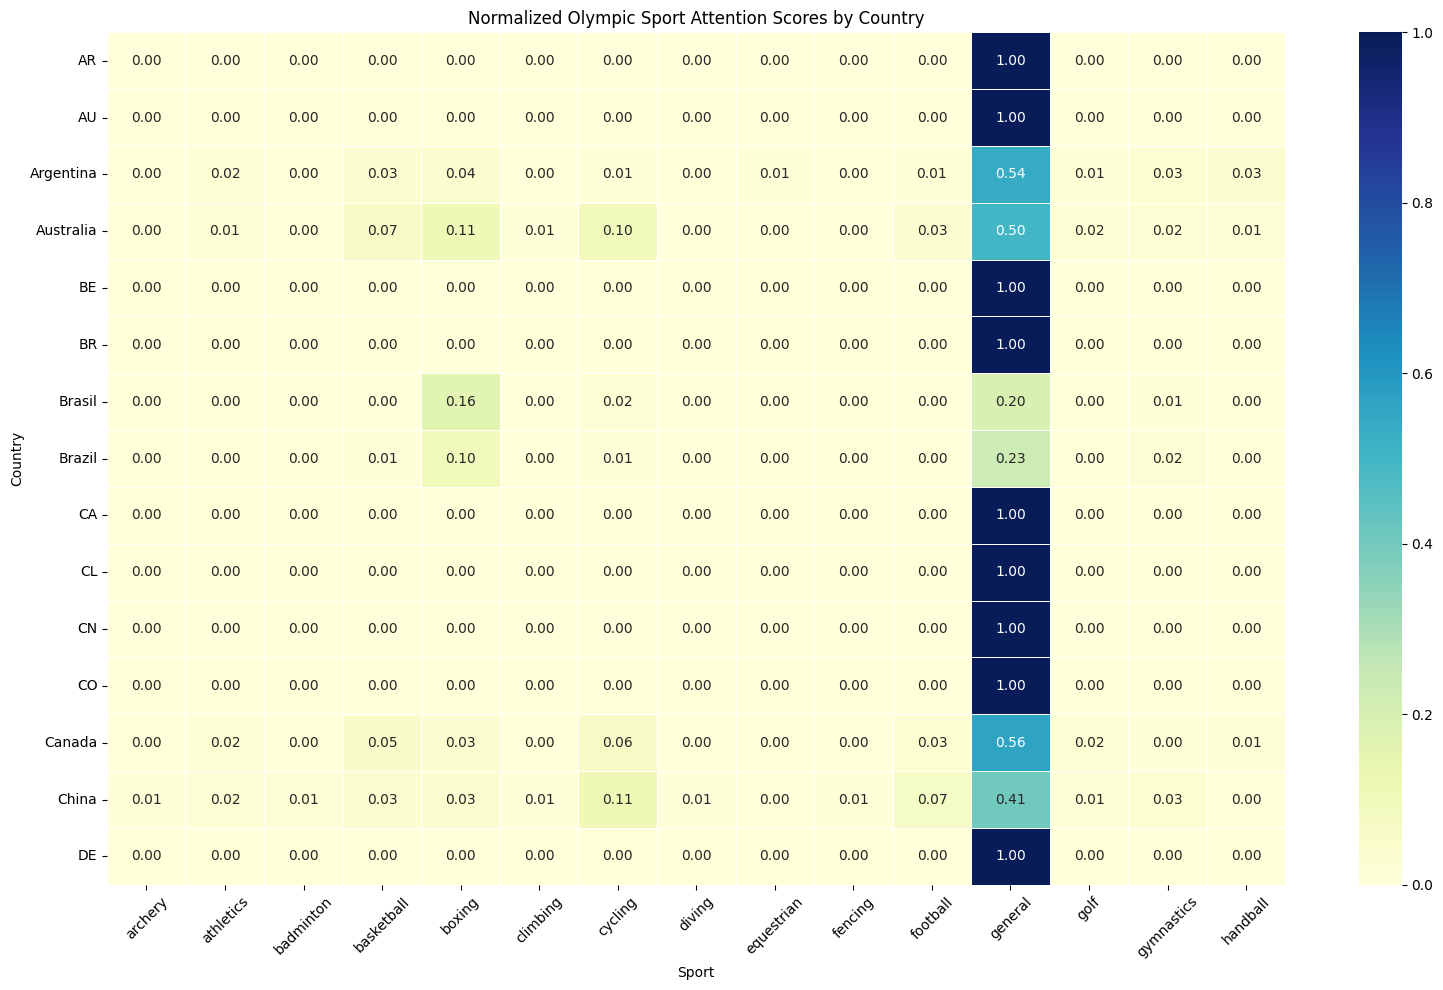

In [15]:
# 6. Visualization

# Create a heatmap of the attention scores
plt.figure(figsize=(16, 10))
sns.heatmap(
    attention_matrix.iloc[:15, :15],  # Show top 15 countries and sports for readability
    cmap="YlGnBu",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Normalized Olympic Sport Attention Scores by Country")
plt.xlabel("Sport")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# 7. Save the final DataFrame for further analysis
attention_matrix.to_csv('normalized_olympic_attention.csv')
print("Analysis complete. Final normalized attention score matrix saved to 'normalized_olympic_attention.csv'")


Analysis complete. Final normalized attention score matrix saved to 'normalized_olympic_attention.csv'
